In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import os
import pickle
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import precision_score, recall_score, f1_score

from scipy.stats import pointbiserialr, chi2_contingency


ATT_INT = ["Administrative", "Informational", "ProductRelated"]
ATT_INT_CATEGORY = ["OperatingSystems", "Browser", "Region", "TrafficType"]
ATT_FLOAT = [
    "Administrative_Duration",
    "Informational_Duration",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay",
]
ATT_STRING = ["Month", "VisitorType"]
ATT_BOOL = ["Weekend", "Revenue"]
ATT_BOOL_NO_TARGET = ["Weekend"]

TARGET = "Revenue"

RANDOM_STATES = [0, 1, 5, 7, 13, 23, 29, 32, 37, 42]

SCALERS = [None, MinMaxScaler, StandardScaler, RobustScaler]
DEPTHS = [3, 4, 5, 6]

In [34]:
def calculate_average_variance(
    average_accuracy, average_precision, average_recall, average_f1
):
    avgs_variances = []
    for i, scaler in enumerate(SCALERS):
        print(f"Scaler: {scaler.__name__ if scaler is not None else None}")

        variance_accuracy = np.var(average_accuracy[i])
        variance_precision = np.var(average_precision[i])
        variance_recall = np.var(average_recall[i])
        variance_f1 = np.var(average_f1[i])

        print(f"Variance of accuracy: {variance_accuracy}")
        print(f"Variance of precision: {variance_precision}")
        print(f"Variance of recall: {variance_recall}")
        print(f"Variance of F1 score: {variance_f1}\n")

        avg_accuracy = np.mean(average_accuracy[i])
        avg_precision = np.mean(average_precision[i])
        avg_recall = np.mean(average_recall[i])
        avg_f1 = np.mean(average_f1[i])

        print(f"Average accuracy: {avg_accuracy}")
        print(f"Average precision: {avg_precision}")
        print(f"Average recall: {avg_recall}")
        print(f"Average F1 score: {avg_f1}\n")
        values = (
            avg_accuracy,
            avg_precision,
            avg_recall,
            avg_f1,
            variance_accuracy,
            variance_precision,
            variance_recall,
            variance_f1,
        )
        avgs_variances.append(values)
    return avgs_variances

In [35]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the data from my_logistic.pkl
with open("my_logistic.pkl", "rb") as f:
    (
        average_accuracy_my_logistic,
        average_precision_my_logistic,
        average_recall_my_logistic,
        average_f1_my_logistic,
    ) = pickle.load(f)

# Load the data from logistic.pkl
with open("logistic.pkl", "rb") as f:
    (
        average_accuracy_logistic,
        average_precision_logistic,
        average_recall_logistic,
        average_f1_logistic,
    ) = pickle.load(f)


avgs_variances_my_logistic = calculate_average_variance(
    average_accuracy_my_logistic,
    average_precision_my_logistic,
    average_recall_my_logistic,
    average_f1_my_logistic,
)

avgs_variances_logistic = calculate_average_variance(
    average_accuracy_logistic,
    average_precision_logistic,
    average_recall_logistic,
    average_f1_logistic,
)

Scaler: None
Variance of accuracy: 0.006343966508999275
Variance of precision: 0.038790129625198115
Variance of recall: 0.13611836836165264
Variance of F1 score: 0.07257256014119179

Average accuracy: 0.8302919708029197
Average precision: 0.6453768587044486
Average recall: 0.4748927568689555
Average F1 score: 0.38064429543706707

Scaler: MinMaxScaler
Variance of accuracy: 0.00026777145661120987
Variance of precision: 0.01846004706894375
Variance of recall: 0.010870871790115366
Variance of F1 score: 0.014734140804535778

Average accuracy: 0.8393349553933496
Average precision: 0.444199342523863
Average recall: 0.17569543811027605
Average F1 score: 0.24192508808478247

Scaler: StandardScaler
Variance of accuracy: 0.0005511797427989018
Variance of precision: 0.0029041635466063895
Variance of recall: 0.0049871481737227925
Variance of F1 score: 0.002231048857600137

Average accuracy: 0.8356447688564476
Average precision: 0.484015719119987
Average recall: 0.5989587112832753
Average F1 score: 

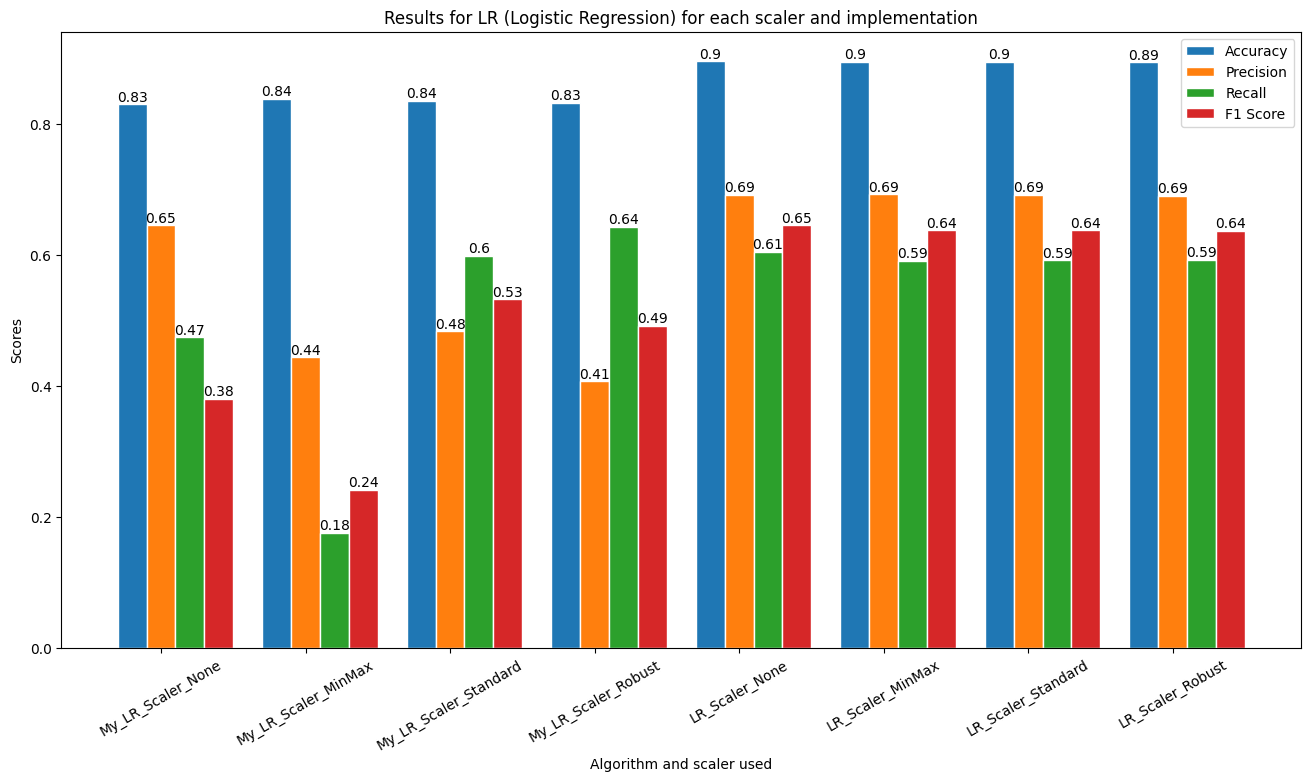

In [36]:
import matplotlib.pyplot as plt

plt.close("all")
# Define the categories and labels
categories = [
    "My_LR_Scaler_None",
    "My_LR_Scaler_MinMax",
    "My_LR_Scaler_Standard",
    "My_LR_Scaler_Robust",
    "LR_Scaler_None",
    "LR_Scaler_MinMax",
    "LR_Scaler_Standard",
    "LR_Scaler_Robust",
]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Extract the values for each category
accuracy_values = [item[0] for item in avgs_variances_my_logistic] + [
    item[0] for item in avgs_variances_logistic
]
precision_values = [item[1] for item in avgs_variances_my_logistic] + [
    item[1] for item in avgs_variances_logistic
]
recall_values = [item[2] for item in avgs_variances_my_logistic] + [
    item[2] for item in avgs_variances_logistic
]
f1score_values = [item[3] for item in avgs_variances_my_logistic] + [
    item[3] for item in avgs_variances_logistic
]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]


plt.figure(figsize=(16, 8))
plt.xticks(rotation=30)
# Create the bar chart
bars1 = plt.bar(
    r1, accuracy_values, width=bar_width, edgecolor="white", label="Accuracy"
)
bars2 = plt.bar(
    r2, precision_values, width=bar_width, edgecolor="white", label="Precision"
)
bars3 = plt.bar(r3, recall_values, width=bar_width, edgecolor="white", label="Recall")
bars4 = plt.bar(
    r4, f1score_values, width=bar_width, edgecolor="white", label="F1 Score"
)


# Function to add value labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            round(height, 2),
            ha="center",
            va="bottom",
        )


# Add labels to the bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Add xticks and labels
plt.xlabel("Algorithm and scaler used")
plt.ylabel("Scores")
plt.title("Results for LR (Logistic Regression) for each scaler and implementation")
plt.xticks([r + bar_width for r in range(len(categories))], categories)

# Add a legend
plt.legend()

plt.savefig("plots/plot_lr_avg.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

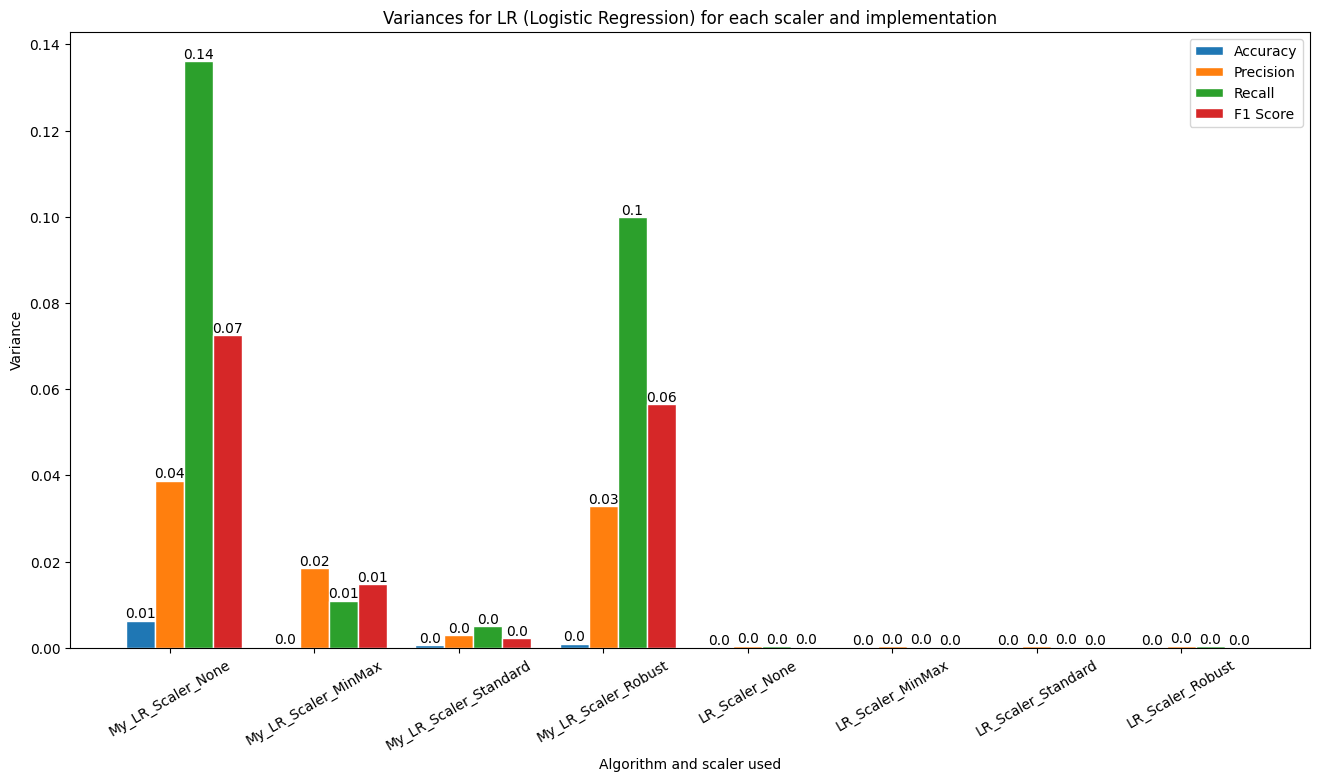

In [37]:
plt.close("all")

# Extract the values for each category
variance_accuracy_values = [item[4] for item in avgs_variances_my_logistic] + [
    item[4] for item in avgs_variances_logistic
]
variance_precision_values = [item[5] for item in avgs_variances_my_logistic] + [
    item[5] for item in avgs_variances_logistic
]
variance_recall_values = [item[6] for item in avgs_variances_my_logistic] + [
    item[6] for item in avgs_variances_logistic
]
variance_f1score_values = [item[7] for item in avgs_variances_my_logistic] + [
    item[7] for item in avgs_variances_logistic
]

plt.figure(figsize=(16, 8))
plt.xticks(rotation=30)
# Create the bar chart
bars1 = plt.bar(
    r1, variance_accuracy_values, width=bar_width, edgecolor="white", label="Accuracy"
)
bars2 = plt.bar(
    r2, variance_precision_values, width=bar_width, edgecolor="white", label="Precision"
)
bars3 = plt.bar(
    r3, variance_recall_values, width=bar_width, edgecolor="white", label="Recall"
)
bars4 = plt.bar(
    r4, variance_f1score_values, width=bar_width, edgecolor="white", label="F1 Score"
)

# Add labels to the bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Add xticks and labels
plt.xlabel("Algorithm and scaler used")
plt.ylabel("Variance")
plt.title("Variances for LR (Logistic Regression) for each scaler and implementation")
plt.xticks([r + bar_width for r in range(len(categories))], categories)

# Add a legend
plt.legend()

plt.savefig("plots/plot_lr_variance.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

## Trees

In [38]:
# Load data
with open("decisionTreeData.pkl", "rb") as f:
    (
        average_accuracy_trees,
        average_precision_trees,
        average_recall_trees,
        average_f1_trees,
    ) = pickle.load(f)

with open("myTreesData.pkl", "rb") as f:
    (
        average_accuracy_my_trees,
        average_precision_my_trees,
        average_recall_my_trees,
        average_f1_my_trees,
    ) = pickle.load(f)

In [39]:
# Convert data into an easier to read form
my_trees_data_accuracy = {}
for depth in range(3, 7):
    my_trees_data_accuracy[depth] = []
    for i, scaler in enumerate(SCALERS):
        l = []
        for j in range(len(RANDOM_STATES)):
            l.append(average_accuracy_my_trees[i][j * 4 + depth - 3])
        my_trees_data_accuracy[depth].append(l)

my_tree_data_precision = {}
for depth in range(3, 7):
    my_tree_data_precision[depth] = []
    for i, scaler in enumerate(SCALERS):
        l = []
        for j in range(len(RANDOM_STATES)):
            l.append(average_precision_my_trees[i][j * 4 + depth - 3])
        my_tree_data_precision[depth].append(l)

my_tree_data_recall = {}
for depth in range(3, 7):
    my_tree_data_recall[depth] = []
    for i, scaler in enumerate(SCALERS):
        l = []
        for j in range(len(RANDOM_STATES)):
            l.append(average_recall_my_trees[i][j * 4 + depth - 3])
        my_tree_data_recall[depth].append(l)

my_tree_data_f1 = {}
for depth in range(3, 7):
    my_tree_data_f1[depth] = []
    for i, scaler in enumerate(SCALERS):
        l = []
        for j in range(len(RANDOM_STATES)):
            l.append(average_f1_my_trees[i][j * 4 + depth - 3])
        my_tree_data_f1[depth].append(l)

# Convert data into an easier to read form
trees_data_accuracy = {}
for depth in range(3, 7):
    trees_data_accuracy[depth] = []
    for i, scaler in enumerate(SCALERS):
        l = []
        for j in range(len(RANDOM_STATES)):
            l.append(average_accuracy_trees[i][j * 4 + depth - 3])
        trees_data_accuracy[depth].append(l)

tree_data_precision = {}
for depth in range(3, 7):
    tree_data_precision[depth] = []
    for i, scaler in enumerate(SCALERS):
        l = []
        for j in range(len(RANDOM_STATES)):
            l.append(average_precision_trees[i][j * 4 + depth - 3])
        tree_data_precision[depth].append(l)

tree_data_recall = {}
for depth in range(3, 7):
    tree_data_recall[depth] = []
    for i, scaler in enumerate(SCALERS):
        l = []
        for j in range(len(RANDOM_STATES)):
            l.append(average_recall_trees[i][j * 4 + depth - 3])
        tree_data_recall[depth].append(l)

tree_data_f1 = {}
for depth in range(3, 7):
    tree_data_f1[depth] = []
    for i, scaler in enumerate(SCALERS):
        l = []
        for j in range(len(RANDOM_STATES)):
            l.append(average_f1_trees[i][j * 4 + depth - 3])
        tree_data_f1[depth].append(l)

Depth: 3
Scaler: None
Variance of accuracy: 3.842032666157552e-05
Variance of precision: 0.0003494004109785979
Variance of recall: 0.0016109752408587793
Variance of F1 score: 0.0005627310047866865

Average accuracy: 0.8931873479318734
Average precision: 0.6787128732693644
Average recall: 0.5995149431978481
Average F1 score: 0.6357392007048249

Scaler: MinMaxScaler
Variance of accuracy: 3.842032666157552e-05
Variance of precision: 0.0003494004109785979
Variance of recall: 0.0016109752408587793
Variance of F1 score: 0.0005627310047866865

Average accuracy: 0.8931873479318734
Average precision: 0.6787128732693644
Average recall: 0.5995149431978481
Average F1 score: 0.6357392007048249

Scaler: StandardScaler
Variance of accuracy: 3.842032666157552e-05
Variance of precision: 0.0003494004109785979
Variance of recall: 0.0016109752408587793
Variance of F1 score: 0.0005627310047866865

Average accuracy: 0.8931873479318734
Average precision: 0.6787128732693644
Average recall: 0.5995149431978481


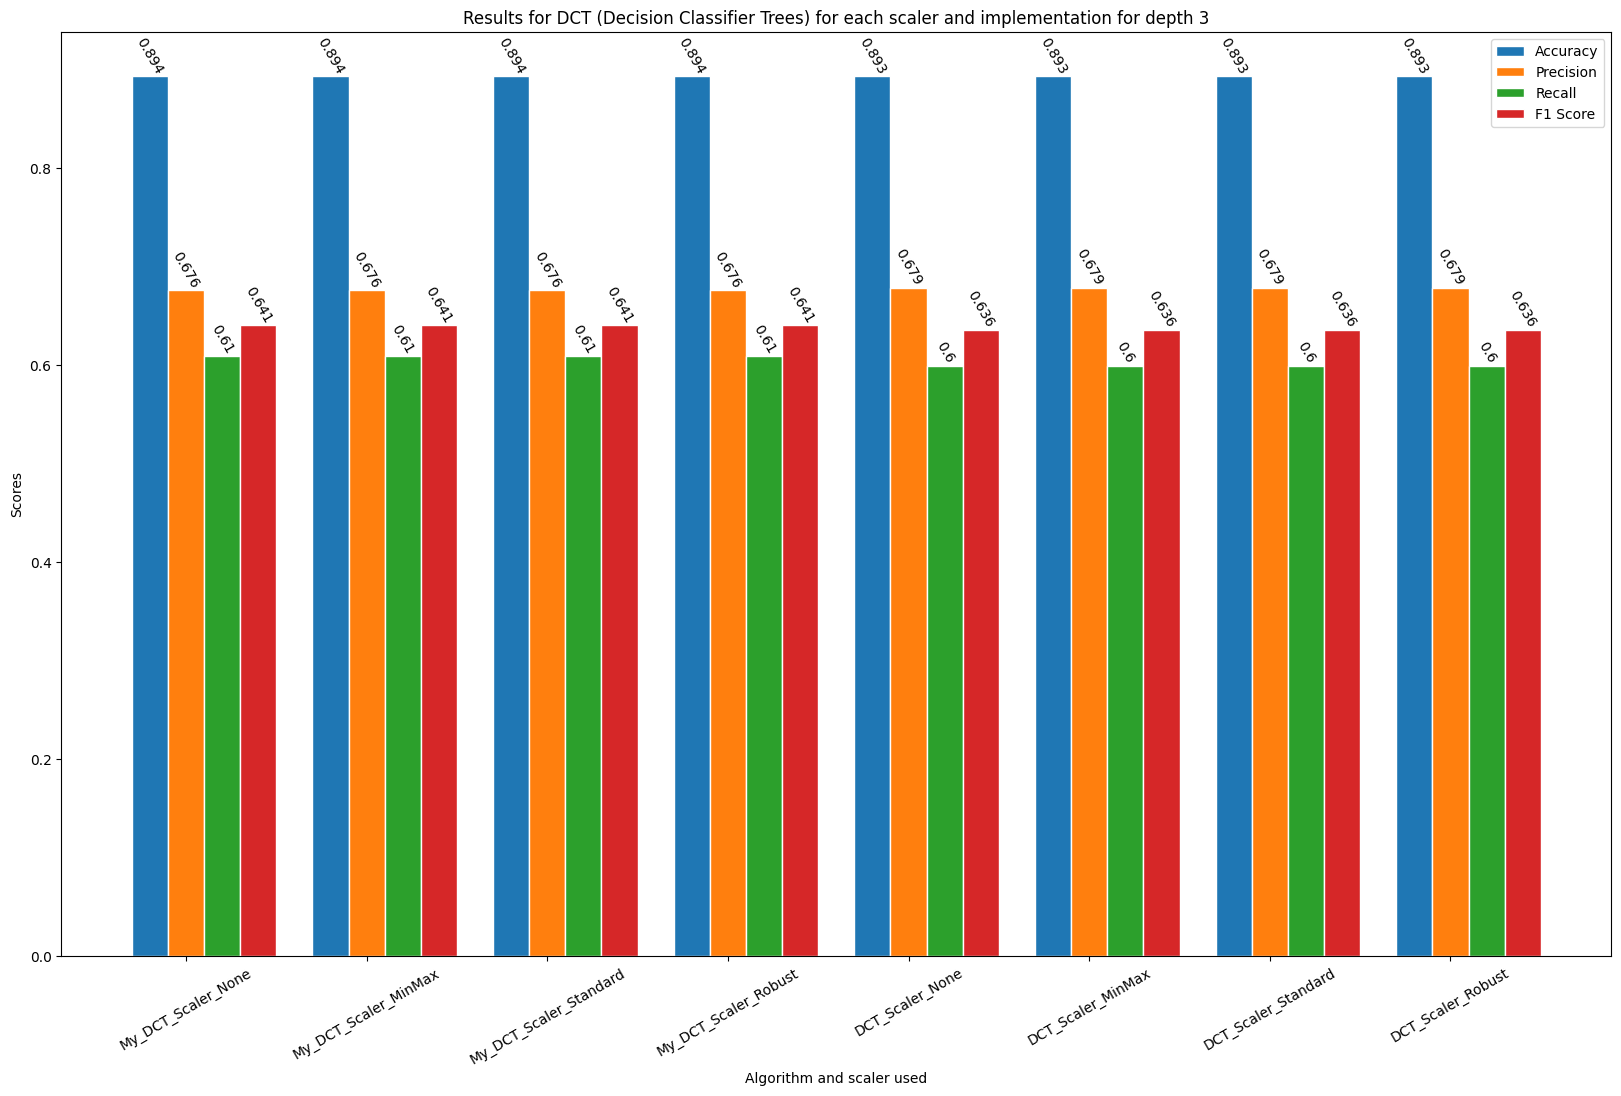

Depth: 4
Scaler: None
Variance of accuracy: 5.249659768636096e-05
Variance of precision: 0.0012895299917319372
Variance of recall: 0.0008279430141401705
Variance of F1 score: 0.00019351528510108888

Average accuracy: 0.8967558799675588
Average precision: 0.7032071668937707
Average recall: 0.5910403333238499
Average F1 score: 0.640914597554816

Scaler: MinMaxScaler
Variance of accuracy: 5.249659768636096e-05
Variance of precision: 0.0012895299917319372
Variance of recall: 0.0008279430141401705
Variance of F1 score: 0.00019351528510108888

Average accuracy: 0.8967558799675588
Average precision: 0.7032071668937707
Average recall: 0.5910403333238499
Average F1 score: 0.640914597554816

Scaler: StandardScaler
Variance of accuracy: 5.249659768636096e-05
Variance of precision: 0.0012895299917319372
Variance of recall: 0.0008279430141401705
Variance of F1 score: 0.00019351528510108888

Average accuracy: 0.8967558799675588
Average precision: 0.7032071668937707
Average recall: 0.5910403333238499

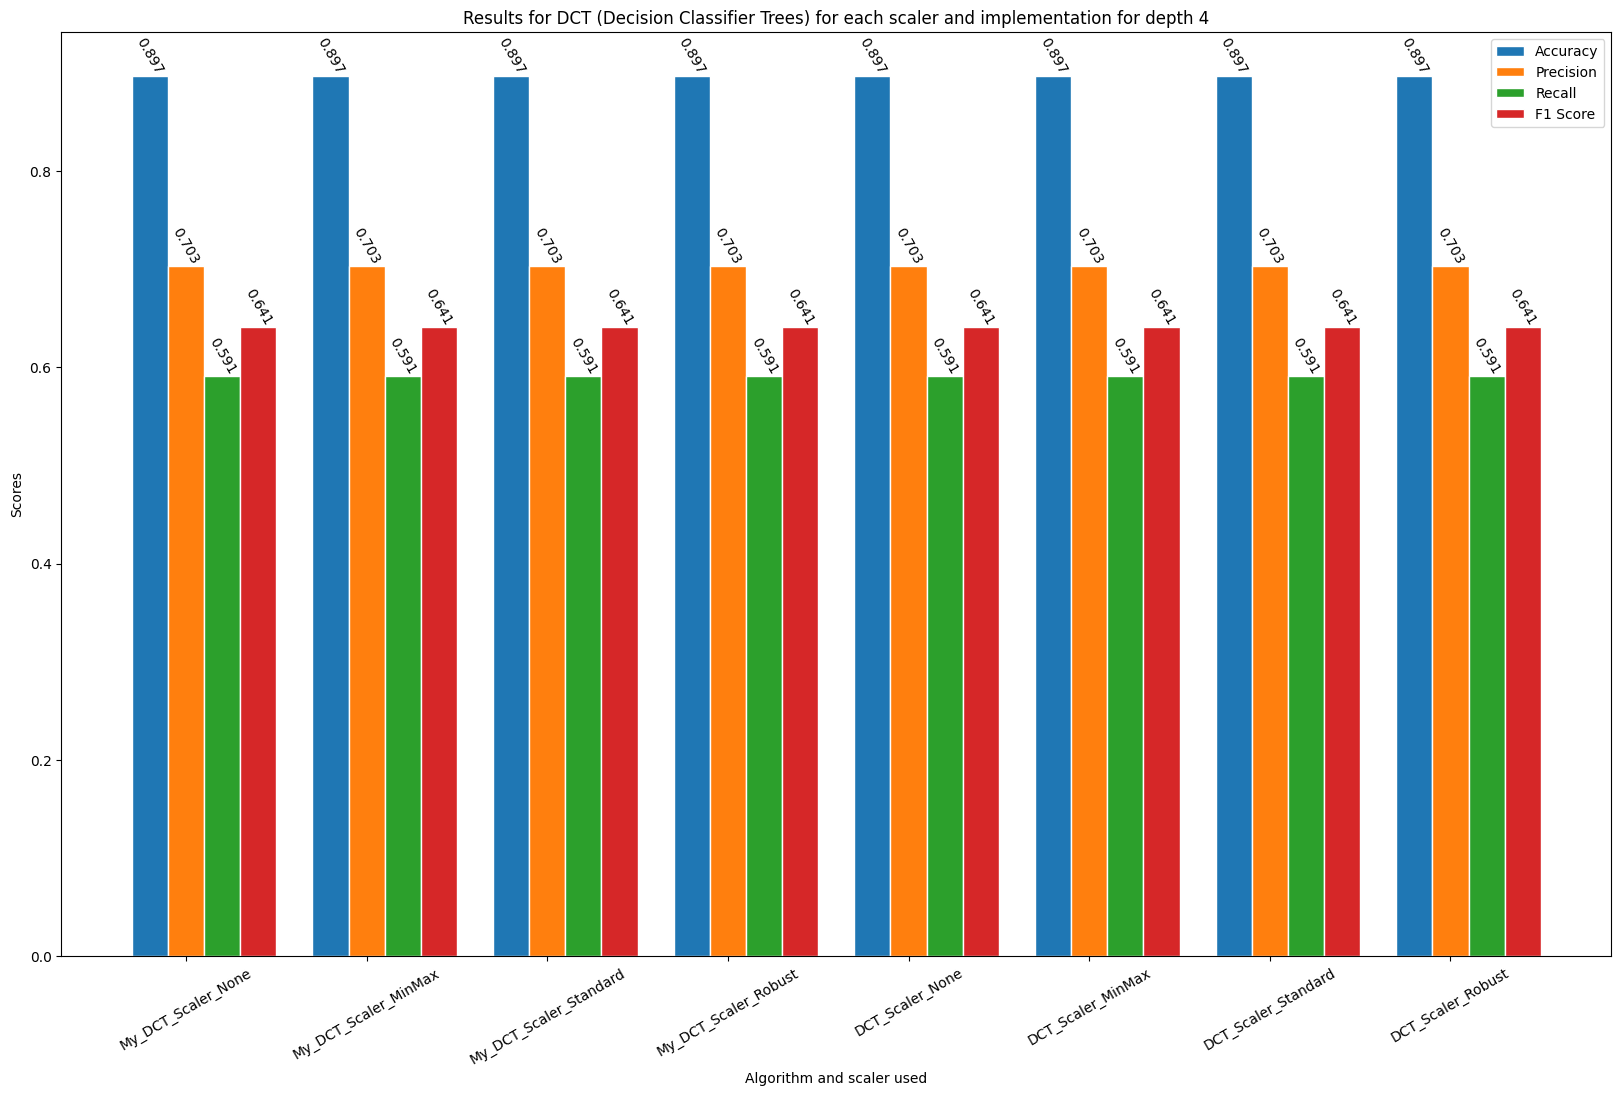

Depth: 5
Scaler: None
Variance of accuracy: 6.335801942920037e-05
Variance of precision: 0.0012796553362440532
Variance of recall: 0.0033085715351824176
Variance of F1 score: 0.0008203016795459248

Average accuracy: 0.8966342254663424
Average precision: 0.7099392191146281
Average recall: 0.5788089400897404
Average F1 score: 0.6347169651354244

Scaler: MinMaxScaler
Variance of accuracy: 6.335801942920037e-05
Variance of precision: 0.0012796553362440532
Variance of recall: 0.0033085715351824176
Variance of F1 score: 0.0008203016795459248

Average accuracy: 0.8966342254663424
Average precision: 0.7099392191146281
Average recall: 0.5788089400897404
Average F1 score: 0.6347169651354244

Scaler: StandardScaler
Variance of accuracy: 6.335801942920037e-05
Variance of precision: 0.0012796553362440532
Variance of recall: 0.0033085715351824176
Variance of F1 score: 0.0008203016795459248

Average accuracy: 0.8966342254663424
Average precision: 0.7099392191146281
Average recall: 0.5788089400897404


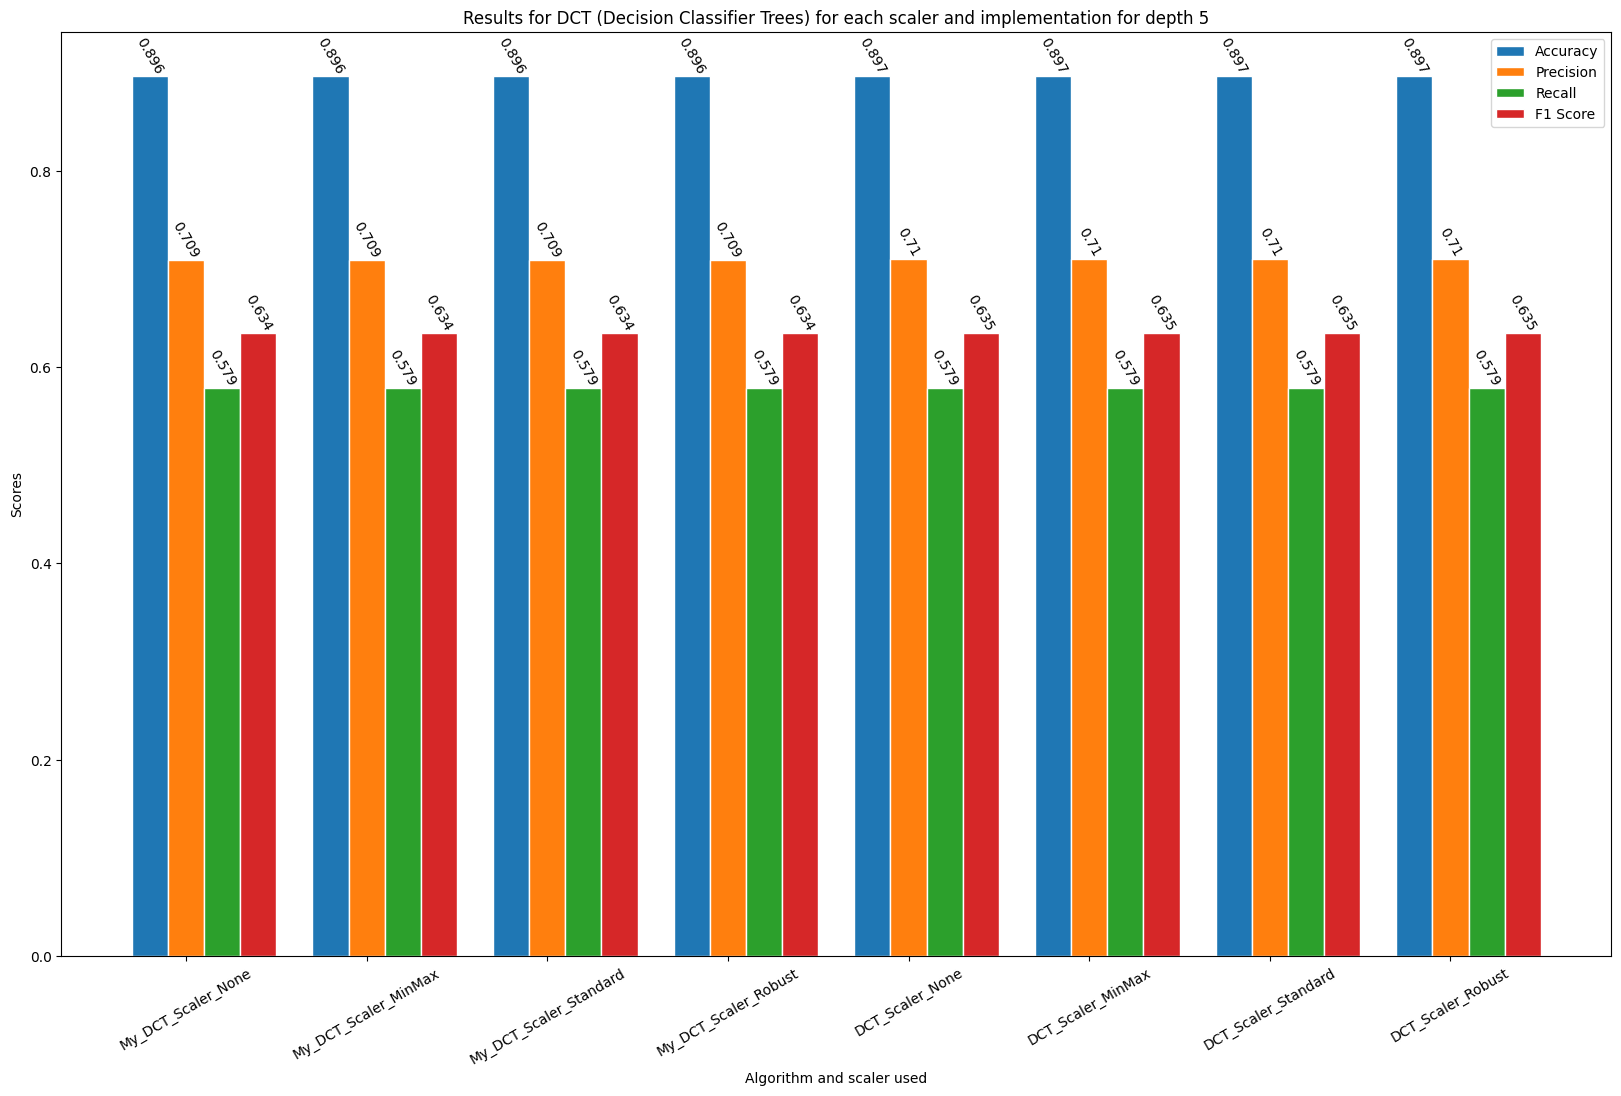

Depth: 6
Scaler: None
Variance of accuracy: 4.690062218433469e-05
Variance of precision: 0.0017367713013133185
Variance of recall: 0.000998240005459131
Variance of F1 score: 0.00045962800690929124

Average accuracy: 0.8967153284671534
Average precision: 0.7137308074017923
Average recall: 0.5685637140954676
Average F1 score: 0.6315725088534255

Scaler: MinMaxScaler
Variance of accuracy: 4.690062218433469e-05
Variance of precision: 0.0017367713013133185
Variance of recall: 0.000998240005459131
Variance of F1 score: 0.00045962800690929124

Average accuracy: 0.8967153284671534
Average precision: 0.7137308074017923
Average recall: 0.5685637140954676
Average F1 score: 0.6315725088534255

Scaler: StandardScaler
Variance of accuracy: 4.690062218433469e-05
Variance of precision: 0.0017367713013133185
Variance of recall: 0.000998240005459131
Variance of F1 score: 0.00045962800690929124

Average accuracy: 0.8967153284671534
Average precision: 0.7137308074017923
Average recall: 0.5685637140954676


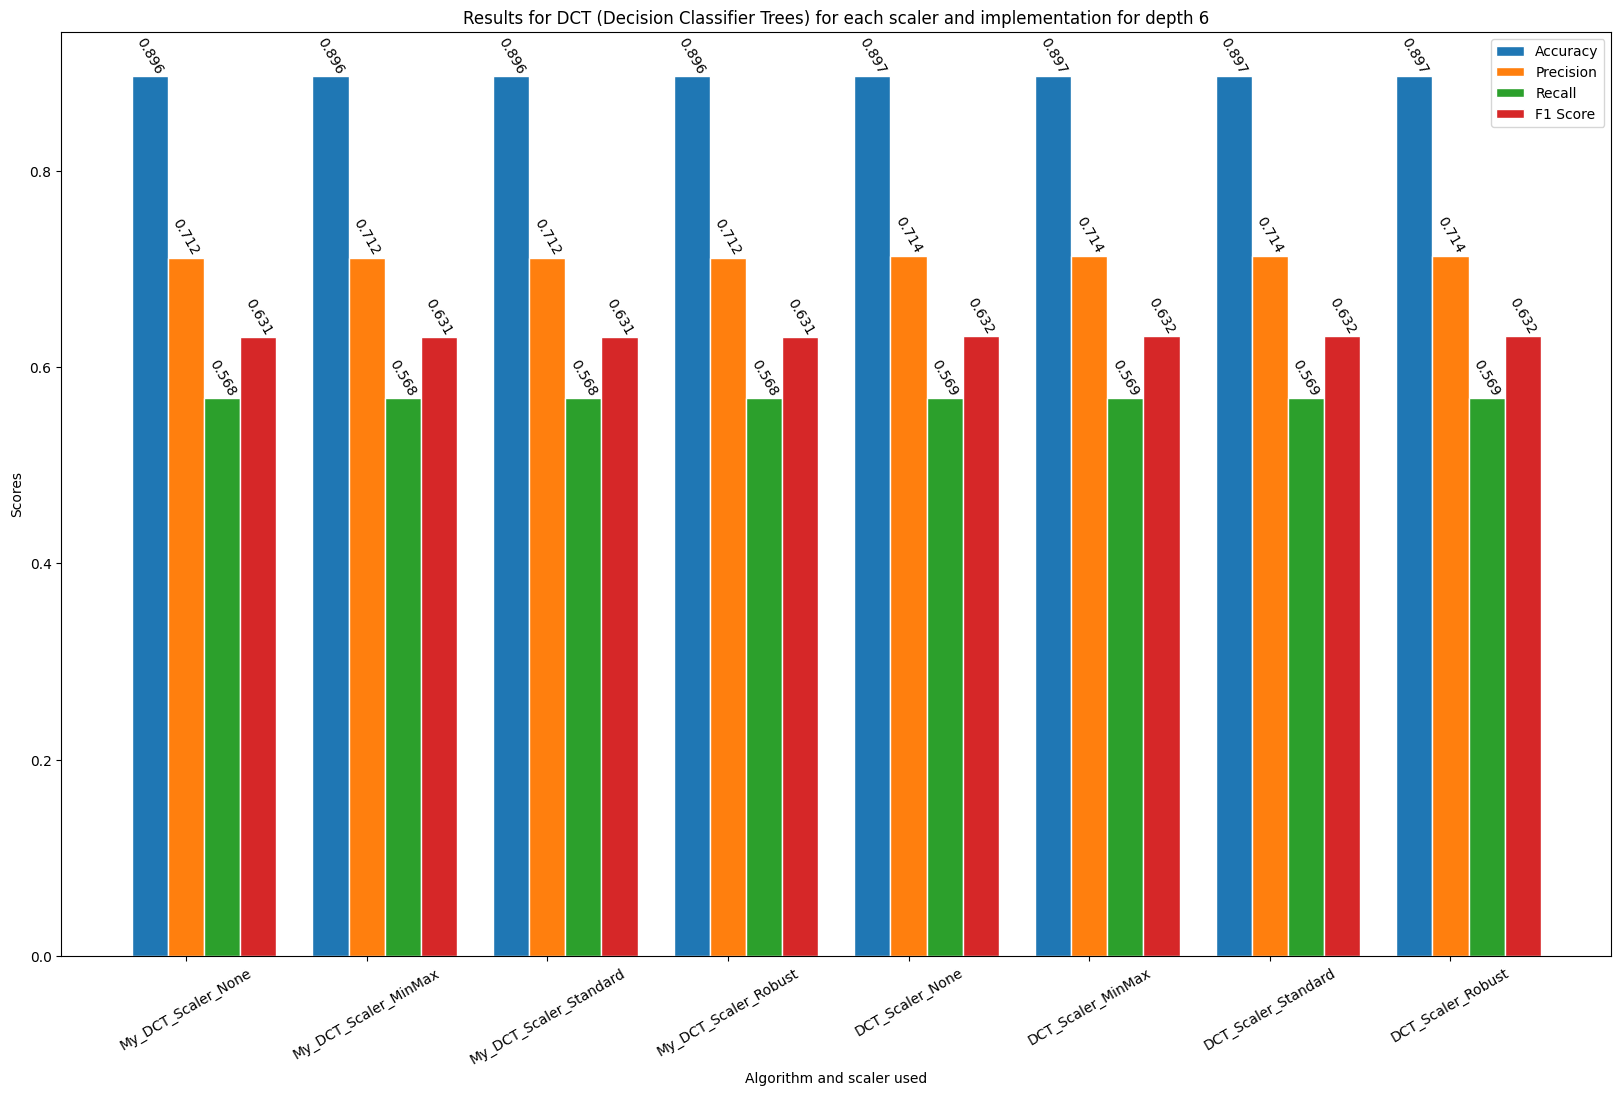

In [40]:
import matplotlib.pyplot as plt

# Define the categories and labels
categories = [
    "My_DCT_Scaler_None",
    "My_DCT_Scaler_MinMax",
    "My_DCT_Scaler_Standard",
    "My_DCT_Scaler_Robust",
    "DCT_Scaler_None",
    "DCT_Scaler_MinMax",
    "DCT_Scaler_Standard",
    "DCT_Scaler_Robust",
]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
scalers = ["None", "MinMaxScaler", "StandardScaler", "RobustScaler"]
for depth in DEPTHS:
    plt.close("all")

    print(f"Depth: {depth}")
    avgs_variances_trees = calculate_average_variance(
        trees_data_accuracy[depth],
        tree_data_precision[depth],
        tree_data_recall[depth],
        tree_data_f1[depth],
    )

    avgs_variances_my_trees = calculate_average_variance(
        my_trees_data_accuracy[depth],
        my_tree_data_precision[depth],
        my_tree_data_recall[depth],
        my_tree_data_f1[depth],
    )
    # Extract the values for each category
    accuracy_values = [item[0] for item in avgs_variances_my_trees] + [
        item[0] for item in avgs_variances_trees
    ]
    precision_values = [item[1] for item in avgs_variances_my_trees] + [
        item[1] for item in avgs_variances_trees
    ]
    recall_values = [item[2] for item in avgs_variances_my_trees] + [
        item[2] for item in avgs_variances_trees
    ]
    f1score_values = [item[3] for item in avgs_variances_my_trees] + [
        item[3] for item in avgs_variances_trees
    ]

    # Set the width of the bars
    bar_width = 0.2

    # Set the positions of the bars on the x-axis
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]

    plt.figure(figsize=(20, 12))
    plt.xticks(rotation=30)
    # Create the bar chart
    bars1 = plt.bar(
        r1, accuracy_values, width=bar_width, edgecolor="white", label="Accuracy"
    )
    bars2 = plt.bar(
        r2, precision_values, width=bar_width, edgecolor="white", label="Precision"
    )
    bars3 = plt.bar(
        r3, recall_values, width=bar_width, edgecolor="white", label="Recall"
    )
    bars4 = plt.bar(
        r4, f1score_values, width=bar_width, edgecolor="white", label="F1 Score"
    )

    # Function to add value labels to the bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                round(height, 3),
                ha="center",
                va="bottom",
                rotation=300,
            )

    # Add labels to the bars
    add_labels(bars1)
    add_labels(bars2)
    add_labels(bars3)
    add_labels(bars4)

    # Add xticks and labels
    plt.xlabel("Algorithm and scaler used")
    plt.ylabel("Scores")
    plt.title(
        "Results for DCT (Decision Classifier Trees) for each scaler and implementation for depth "
        + str(depth)
    )
    plt.xticks([r + bar_width for r in range(len(categories))], categories)

    # Add a legend
    plt.legend()

    plt.savefig(f"plots/plot_dct_avg_{depth}.png", dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()

Depth: 3
Scaler: None
Variance of accuracy: 3.842032666157552e-05
Variance of precision: 0.0003494004109785979
Variance of recall: 0.0016109752408587793
Variance of F1 score: 0.0005627310047866865

Average accuracy: 0.8931873479318734
Average precision: 0.6787128732693644
Average recall: 0.5995149431978481
Average F1 score: 0.6357392007048249

Scaler: MinMaxScaler
Variance of accuracy: 3.842032666157552e-05
Variance of precision: 0.0003494004109785979
Variance of recall: 0.0016109752408587793
Variance of F1 score: 0.0005627310047866865

Average accuracy: 0.8931873479318734
Average precision: 0.6787128732693644
Average recall: 0.5995149431978481
Average F1 score: 0.6357392007048249

Scaler: StandardScaler
Variance of accuracy: 3.842032666157552e-05
Variance of precision: 0.0003494004109785979
Variance of recall: 0.0016109752408587793
Variance of F1 score: 0.0005627310047866865

Average accuracy: 0.8931873479318734
Average precision: 0.6787128732693644
Average recall: 0.5995149431978481


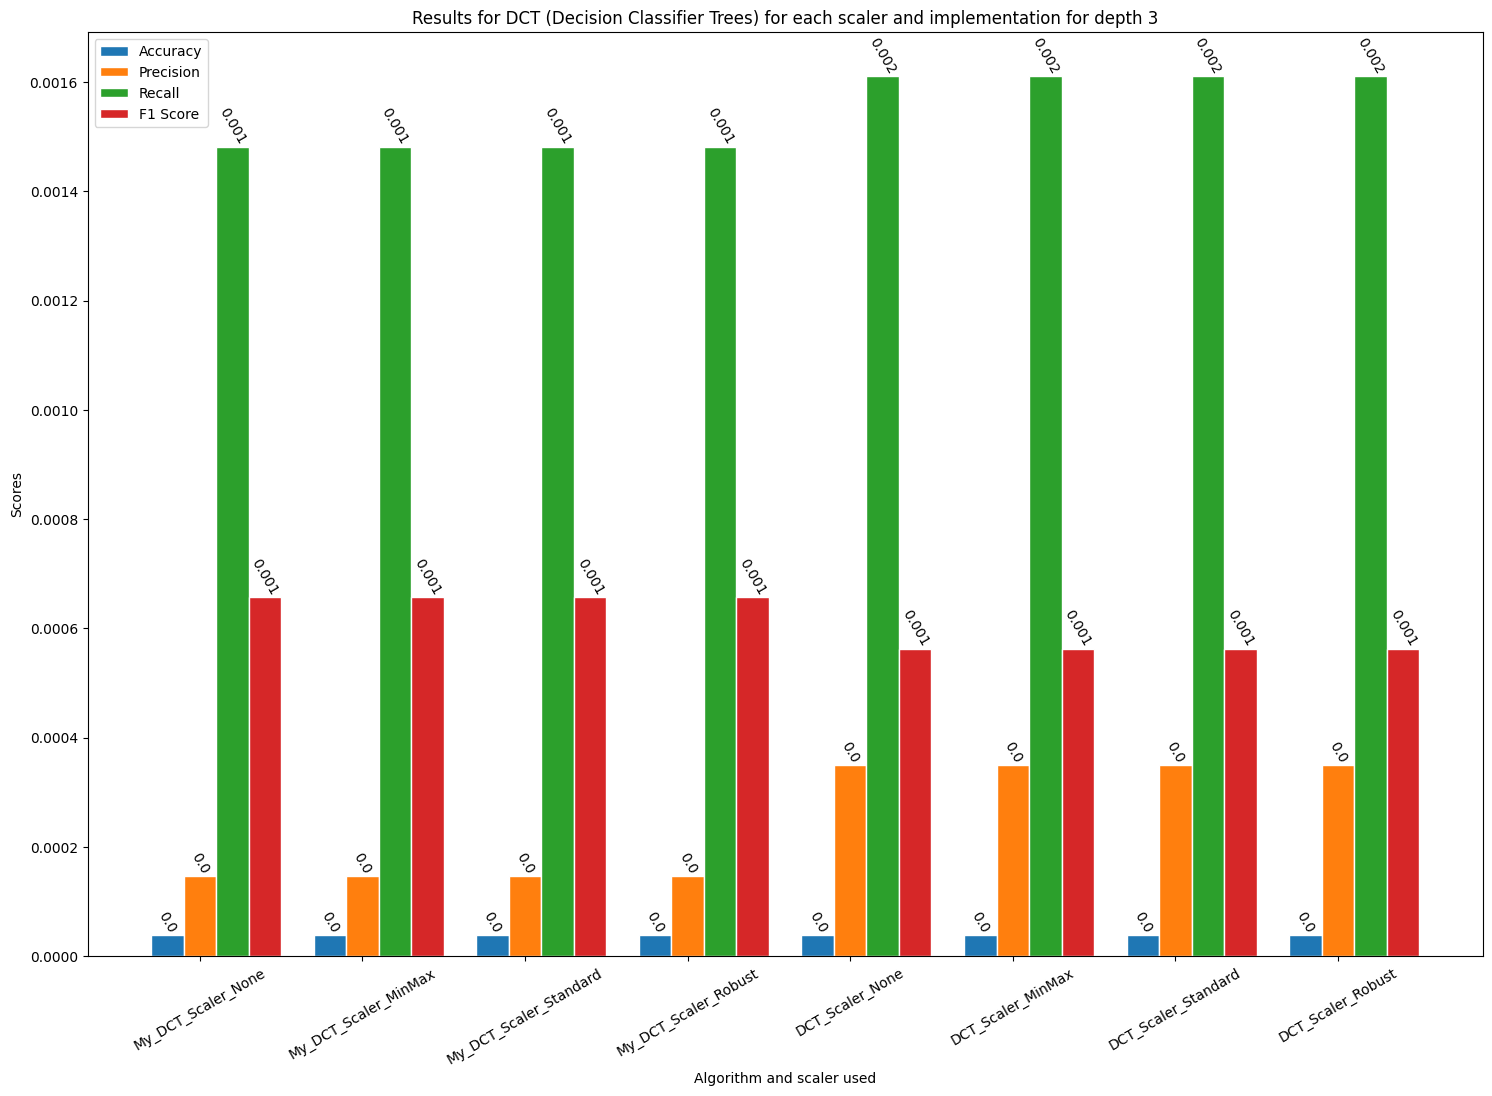

Depth: 4
Scaler: None
Variance of accuracy: 5.249659768636096e-05
Variance of precision: 0.0012895299917319372
Variance of recall: 0.0008279430141401705
Variance of F1 score: 0.00019351528510108888

Average accuracy: 0.8967558799675588
Average precision: 0.7032071668937707
Average recall: 0.5910403333238499
Average F1 score: 0.640914597554816

Scaler: MinMaxScaler
Variance of accuracy: 5.249659768636096e-05
Variance of precision: 0.0012895299917319372
Variance of recall: 0.0008279430141401705
Variance of F1 score: 0.00019351528510108888

Average accuracy: 0.8967558799675588
Average precision: 0.7032071668937707
Average recall: 0.5910403333238499
Average F1 score: 0.640914597554816

Scaler: StandardScaler
Variance of accuracy: 5.249659768636096e-05
Variance of precision: 0.0012895299917319372
Variance of recall: 0.0008279430141401705
Variance of F1 score: 0.00019351528510108888

Average accuracy: 0.8967558799675588
Average precision: 0.7032071668937707
Average recall: 0.5910403333238499

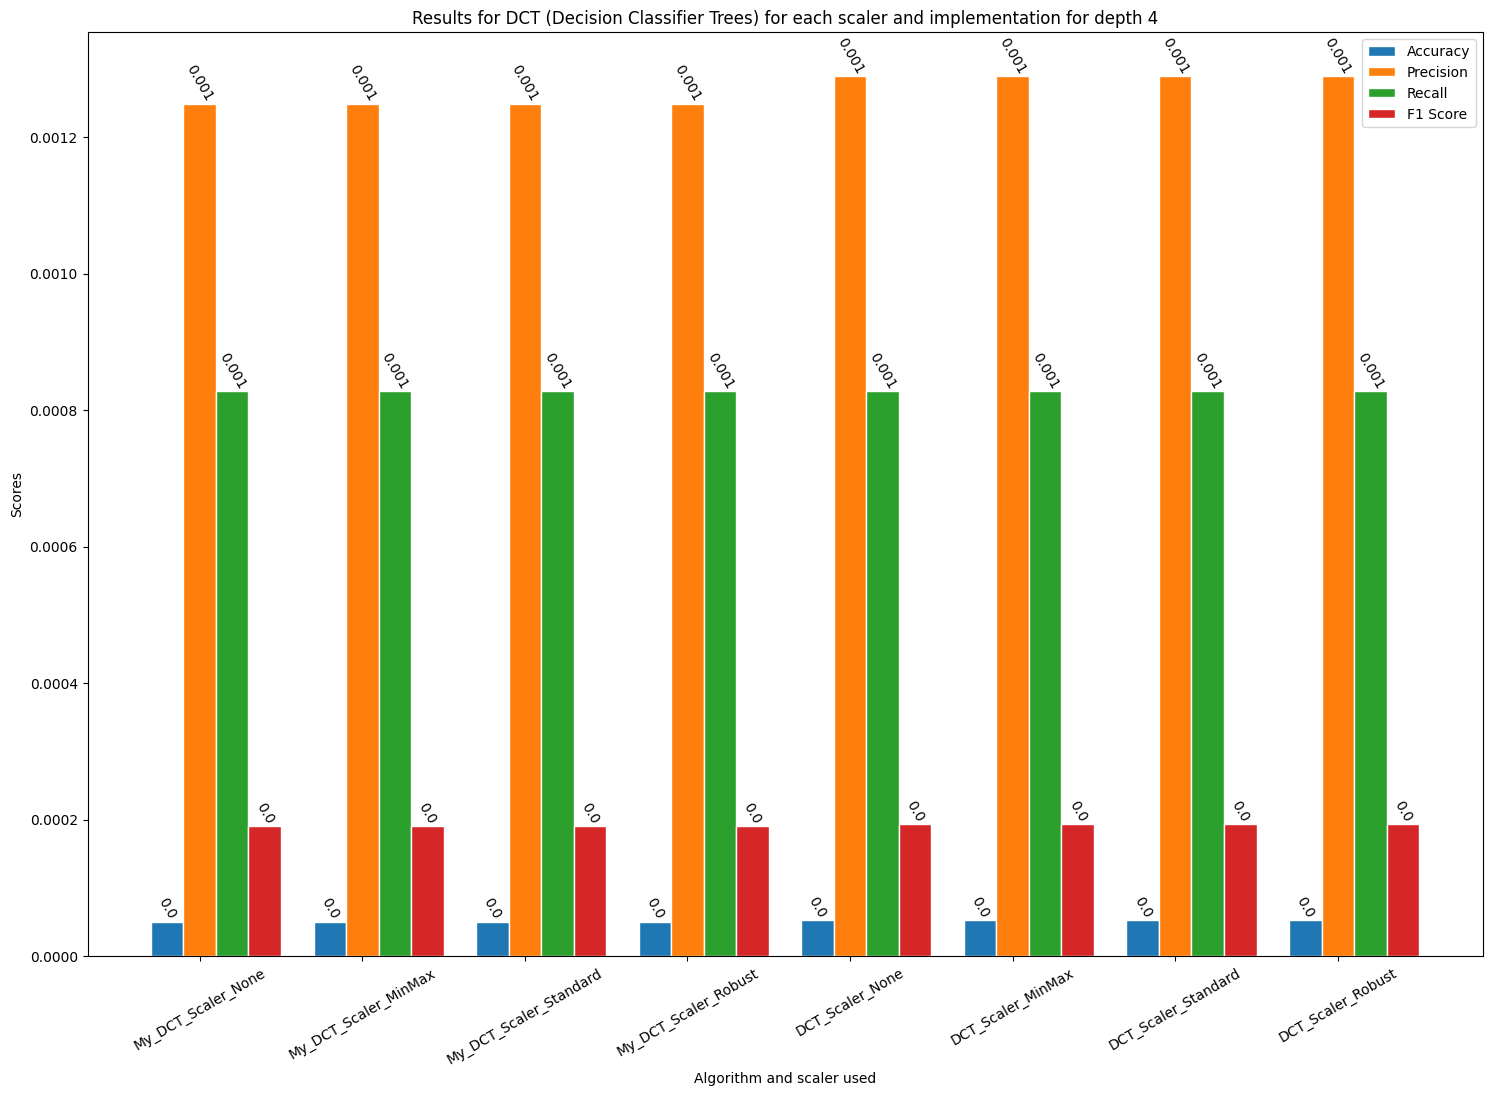

Depth: 5
Scaler: None
Variance of accuracy: 6.335801942920037e-05
Variance of precision: 0.0012796553362440532
Variance of recall: 0.0033085715351824176
Variance of F1 score: 0.0008203016795459248

Average accuracy: 0.8966342254663424
Average precision: 0.7099392191146281
Average recall: 0.5788089400897404
Average F1 score: 0.6347169651354244

Scaler: MinMaxScaler
Variance of accuracy: 6.335801942920037e-05
Variance of precision: 0.0012796553362440532
Variance of recall: 0.0033085715351824176
Variance of F1 score: 0.0008203016795459248

Average accuracy: 0.8966342254663424
Average precision: 0.7099392191146281
Average recall: 0.5788089400897404
Average F1 score: 0.6347169651354244

Scaler: StandardScaler
Variance of accuracy: 6.335801942920037e-05
Variance of precision: 0.0012796553362440532
Variance of recall: 0.0033085715351824176
Variance of F1 score: 0.0008203016795459248

Average accuracy: 0.8966342254663424
Average precision: 0.7099392191146281
Average recall: 0.5788089400897404


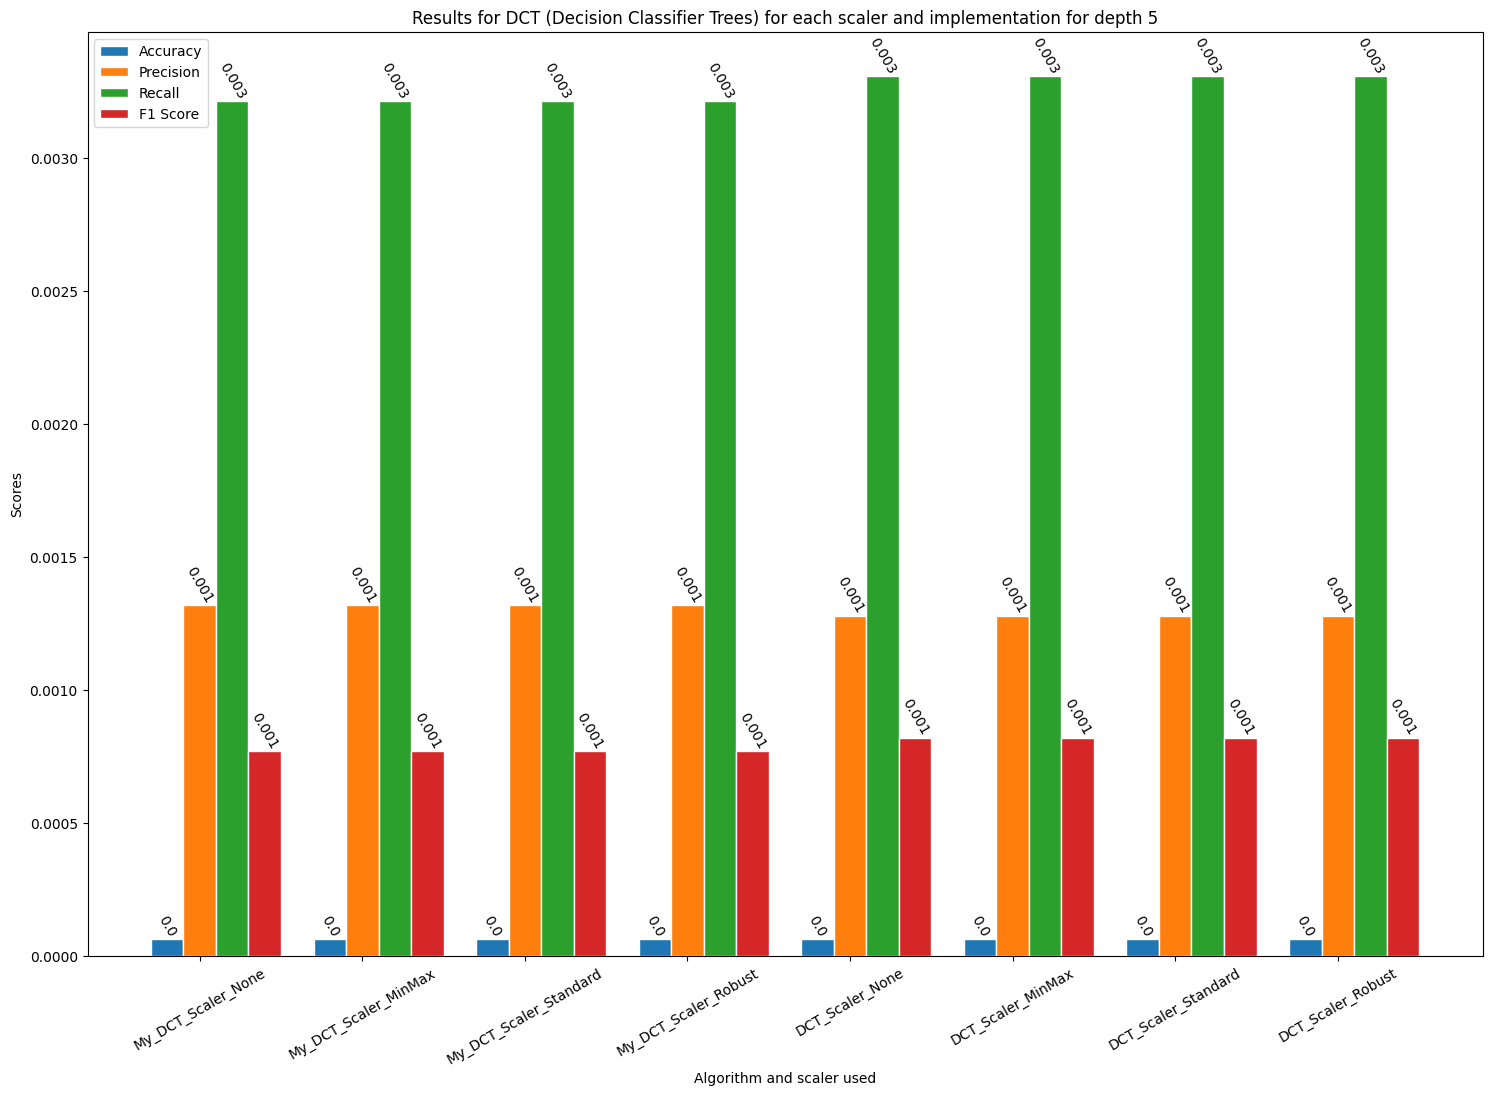

Depth: 6
Scaler: None
Variance of accuracy: 4.690062218433469e-05
Variance of precision: 0.0017367713013133185
Variance of recall: 0.000998240005459131
Variance of F1 score: 0.00045962800690929124

Average accuracy: 0.8967153284671534
Average precision: 0.7137308074017923
Average recall: 0.5685637140954676
Average F1 score: 0.6315725088534255

Scaler: MinMaxScaler
Variance of accuracy: 4.690062218433469e-05
Variance of precision: 0.0017367713013133185
Variance of recall: 0.000998240005459131
Variance of F1 score: 0.00045962800690929124

Average accuracy: 0.8967153284671534
Average precision: 0.7137308074017923
Average recall: 0.5685637140954676
Average F1 score: 0.6315725088534255

Scaler: StandardScaler
Variance of accuracy: 4.690062218433469e-05
Variance of precision: 0.0017367713013133185
Variance of recall: 0.000998240005459131
Variance of F1 score: 0.00045962800690929124

Average accuracy: 0.8967153284671534
Average precision: 0.7137308074017923
Average recall: 0.5685637140954676


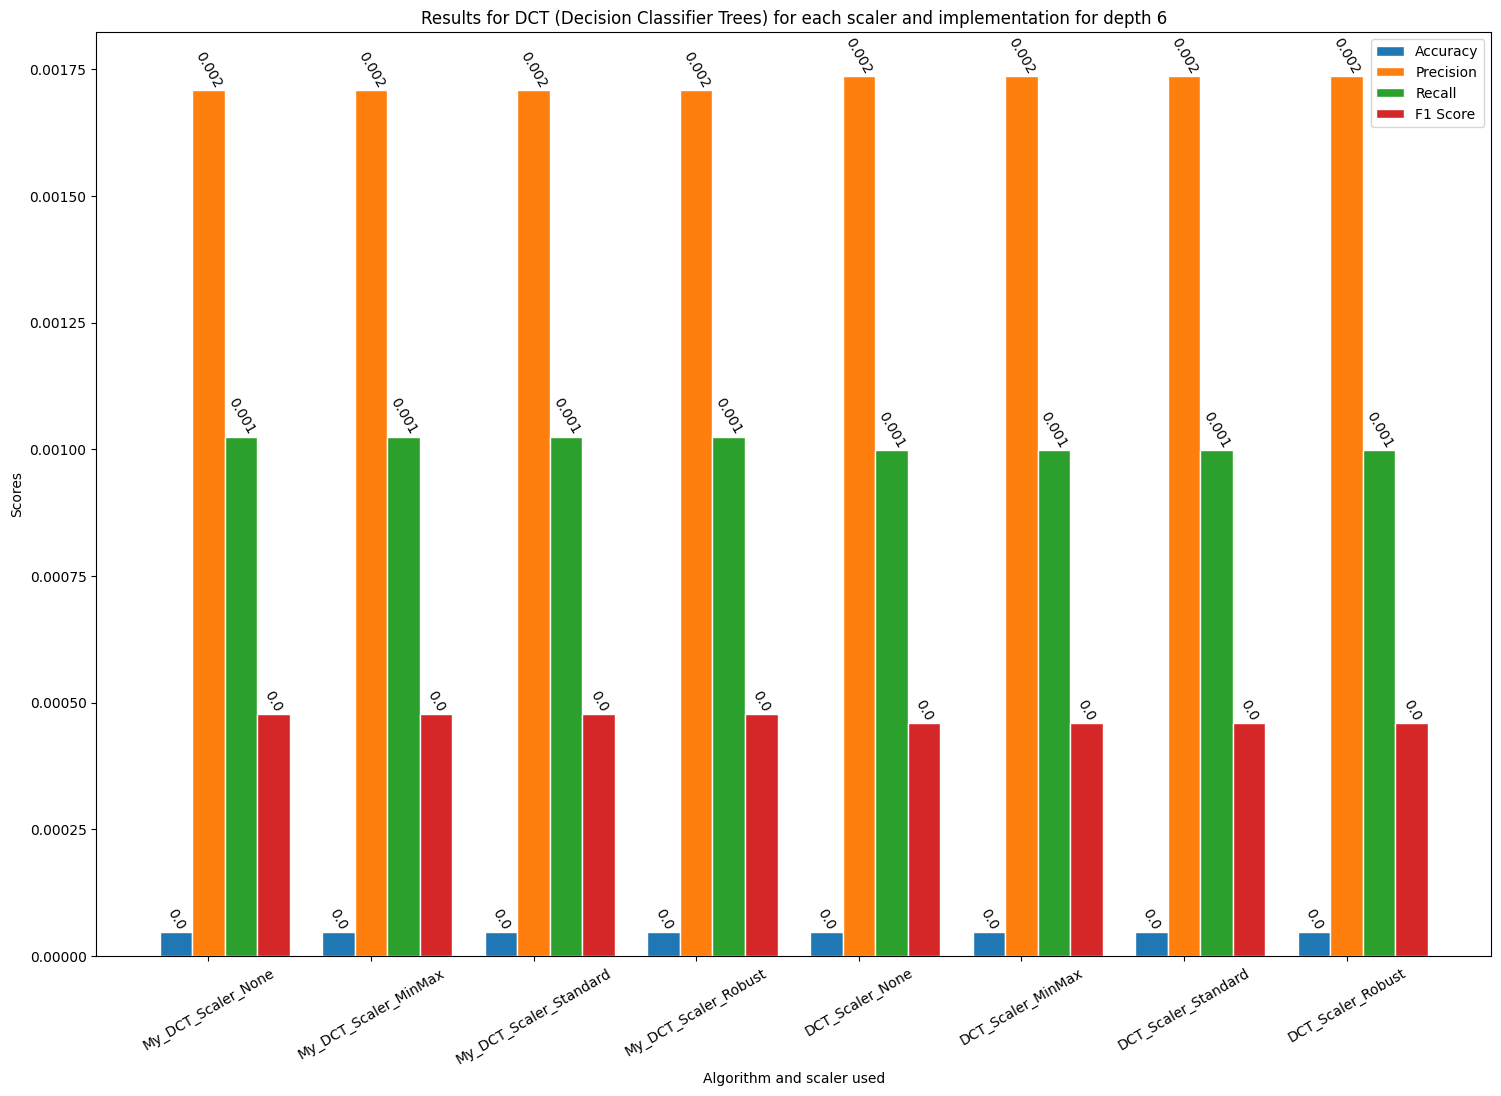

In [41]:
import matplotlib.pyplot as plt

# Define the categories and labels
categories = [
    "My_DCT_Scaler_None",
    "My_DCT_Scaler_MinMax",
    "My_DCT_Scaler_Standard",
    "My_DCT_Scaler_Robust",
    "DCT_Scaler_None",
    "DCT_Scaler_MinMax",
    "DCT_Scaler_Standard",
    "DCT_Scaler_Robust",
]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
scalers = ["None", "MinMaxScaler", "StandardScaler", "RobustScaler"]
for depth in DEPTHS:
    plt.close("all")

    print(f"Depth: {depth}")
    avgs_variances_trees = calculate_average_variance(
        trees_data_accuracy[depth],
        tree_data_precision[depth],
        tree_data_recall[depth],
        tree_data_f1[depth],
    )

    avgs_variances_my_trees = calculate_average_variance(
        my_trees_data_accuracy[depth],
        my_tree_data_precision[depth],
        my_tree_data_recall[depth],
        my_tree_data_f1[depth],
    )
    # Extract the values for each category
    accuracy_values = [item[4] for item in avgs_variances_my_trees] + [
        item[4] for item in avgs_variances_trees
    ]
    precision_values = [item[5] for item in avgs_variances_my_trees] + [
        item[5] for item in avgs_variances_trees
    ]
    recall_values = [item[6] for item in avgs_variances_my_trees] + [
        item[6] for item in avgs_variances_trees
    ]
    f1score_values = [item[7] for item in avgs_variances_my_trees] + [
        item[7] for item in avgs_variances_trees
    ]

    # Set the width of the bars
    bar_width = 0.2

    # Set the positions of the bars on the x-axis
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]

    plt.figure(figsize=(18, 12))
    plt.xticks(rotation=30)
    # Create the bar chart
    bars1 = plt.bar(
        r1, accuracy_values, width=bar_width, edgecolor="white", label="Accuracy"
    )
    bars2 = plt.bar(
        r2, precision_values, width=bar_width, edgecolor="white", label="Precision"
    )
    bars3 = plt.bar(
        r3, recall_values, width=bar_width, edgecolor="white", label="Recall"
    )
    bars4 = plt.bar(
        r4, f1score_values, width=bar_width, edgecolor="white", label="F1 Score"
    )

    # Function to add value labels to the bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                round(height, 3),
                ha="center",
                va="bottom",
                rotation=300,
            )

    # Add labels to the bars
    add_labels(bars1)
    add_labels(bars2)
    add_labels(bars3)
    add_labels(bars4)

    # Add xticks and labels
    plt.xlabel("Algorithm and scaler used")
    plt.ylabel("Scores")
    plt.title(
        "Results for DCT (Decision Classifier Trees) for each scaler and implementation for depth "
        + str(depth)
    )
    plt.xticks([r + bar_width for r in range(len(categories))], categories)

    # Add a legend
    plt.legend()

    plt.savefig(f"plots/plot_dct_var_{depth}.png", dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()